Average RMSE: 5.55 ± 0.24
Average R²: 0.78 ± 0.02


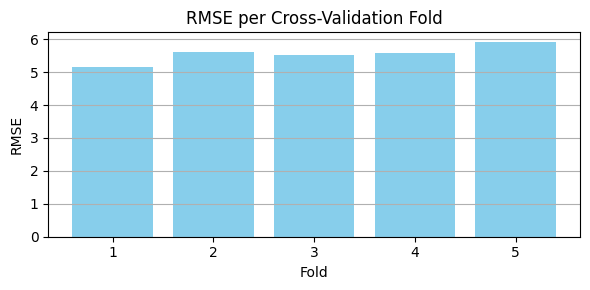

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(r'C:\Users\hempe\Studium\Real_Project\Project_repo\data\processed\df_train_processed.csv')

# Define features and target
X = df.drop(columns=['tm_c'])
y = df['tm_c']   

# --- Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize model 
model = SVR(kernel='rbf') 

# Perform 5-fold cross-validation
cv = cross_validate(model, X_scaled, y, cv=5, scoring=('r2', 'neg_root_mean_squared_error'))
 
# Convert scores to positive RMSE
rmse_scores = -cv['test_neg_root_mean_squared_error']
r2_scores = cv['test_r2']

# Print mean and std
print(f"Average RMSE: {rmse_scores.mean():.2f} ± {rmse_scores.std():.2f}")
print(f"Average R²: {r2_scores.mean():.2f} ± {r2_scores.std():.2f}")

# Create DataFrame for plotting
rmse_df = pd.DataFrame({
    'Fold': range(1, 6),
    'RMSE': rmse_scores
})

# Plot RMSE per fold
plt.figure(figsize=(6, 3))
plt.bar(rmse_df['Fold'], rmse_df['RMSE'], color='skyblue')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.title('RMSE per Cross-Validation Fold')
plt.xticks(rmse_df['Fold'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()